# CUSTOMER SEGMENTATION

## Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gnr_n\Downloads\Customer Data.csv")


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Data Wrangling 

In [7]:
mean = df['MINIMUM_PAYMENTS'].mean()
median = df['MINIMUM_PAYMENTS'].median()
mode = df['MINIMUM_PAYMENTS'].mode()

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 864.2065423050816
Median: 312.343947
Mode: 0    299.351881
Name: MINIMUM_PAYMENTS, dtype: float64


In [8]:
counts = df['MINIMUM_PAYMENTS'].value_counts(dropna=False)
print(counts)


NaN            313
299.351881       2
150.317143       1
271.528169       1
6404.855484      1
              ... 
181.773223       1
711.894455       1
256.522546       1
127.799107       1
88.288956        1
Name: MINIMUM_PAYMENTS, Length: 8637, dtype: int64


In [9]:

# Assuming df is your DataFrame
# Impute NaN values in 'minimum payments' column with 0 where 'payments' column is 0
df['MINIMUM_PAYMENTS'] = np.where((df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna()), 0, df['MINIMUM_PAYMENTS'])

df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
# Fill NaN values with mean for 'CREDIT_LIMIT' column
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)


In [11]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


In [12]:
# Assuming df is your DataFrame
df.drop(columns=['CUST_ID'], inplace=True)

# Exploratory Data Analysis

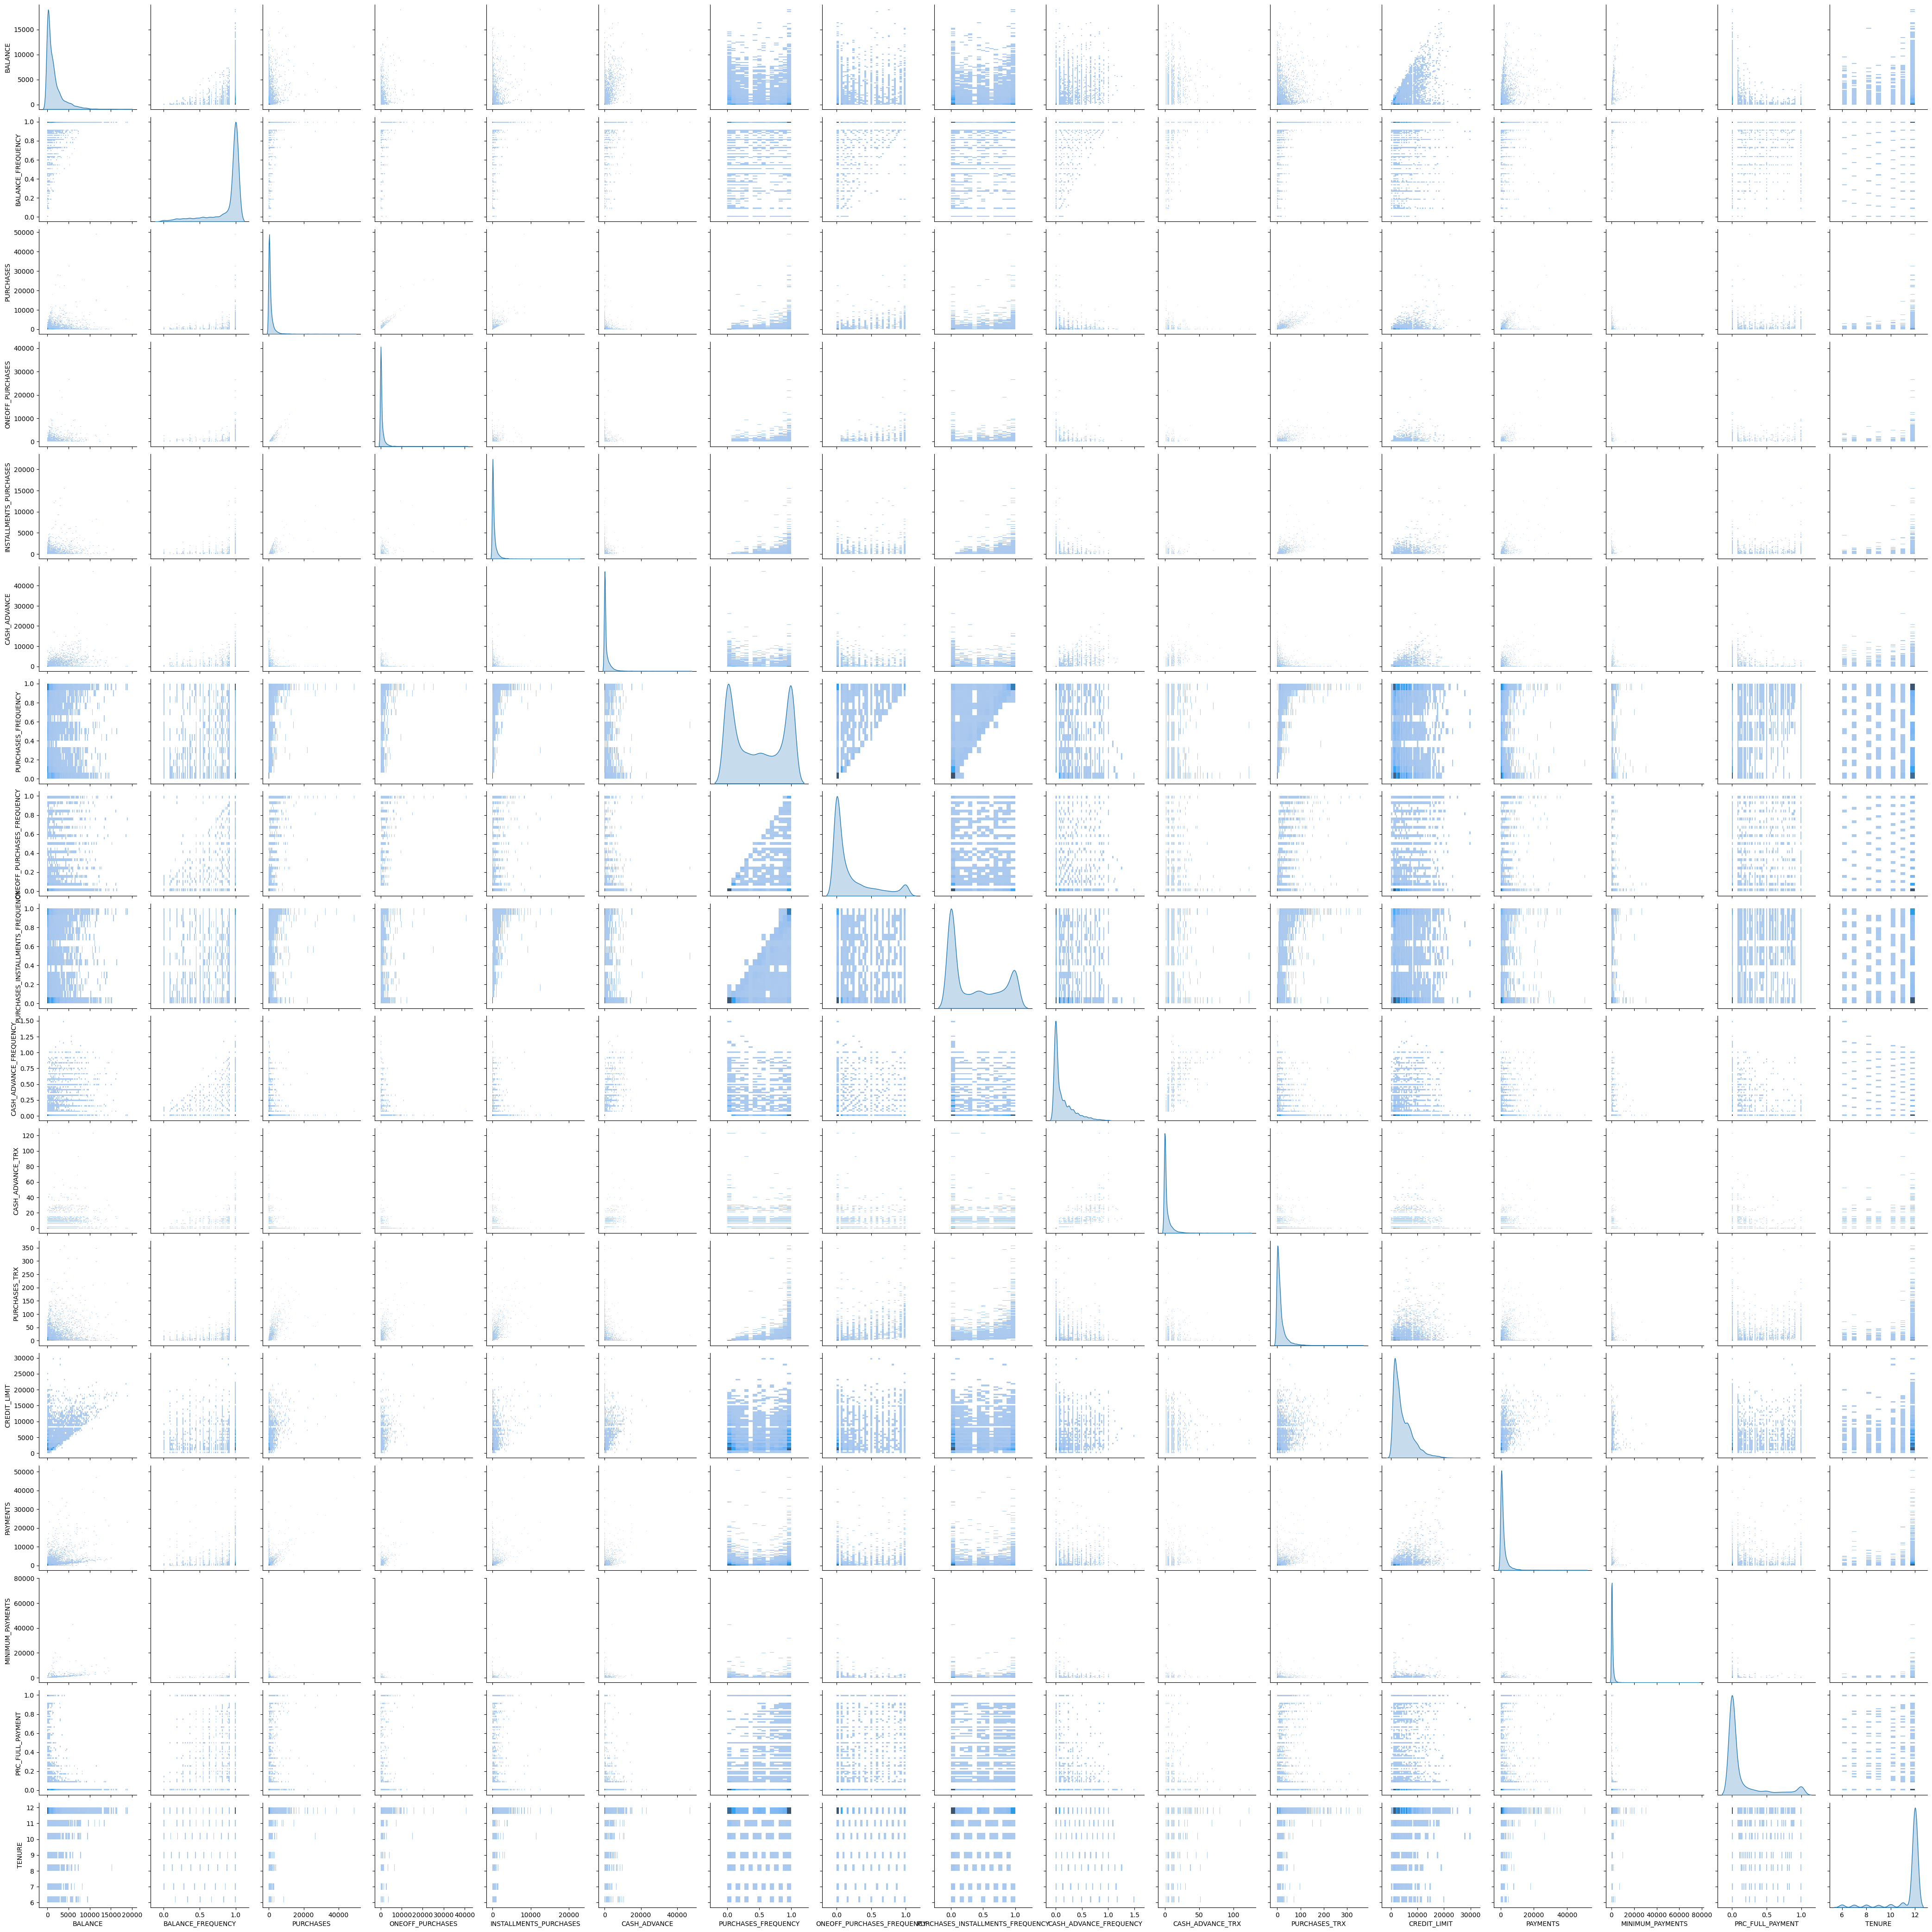

In [13]:
# Assuming df is your DataFrame
#sns.pairplot(df, kind="hist", diag_kind="kde")
#plt.show()

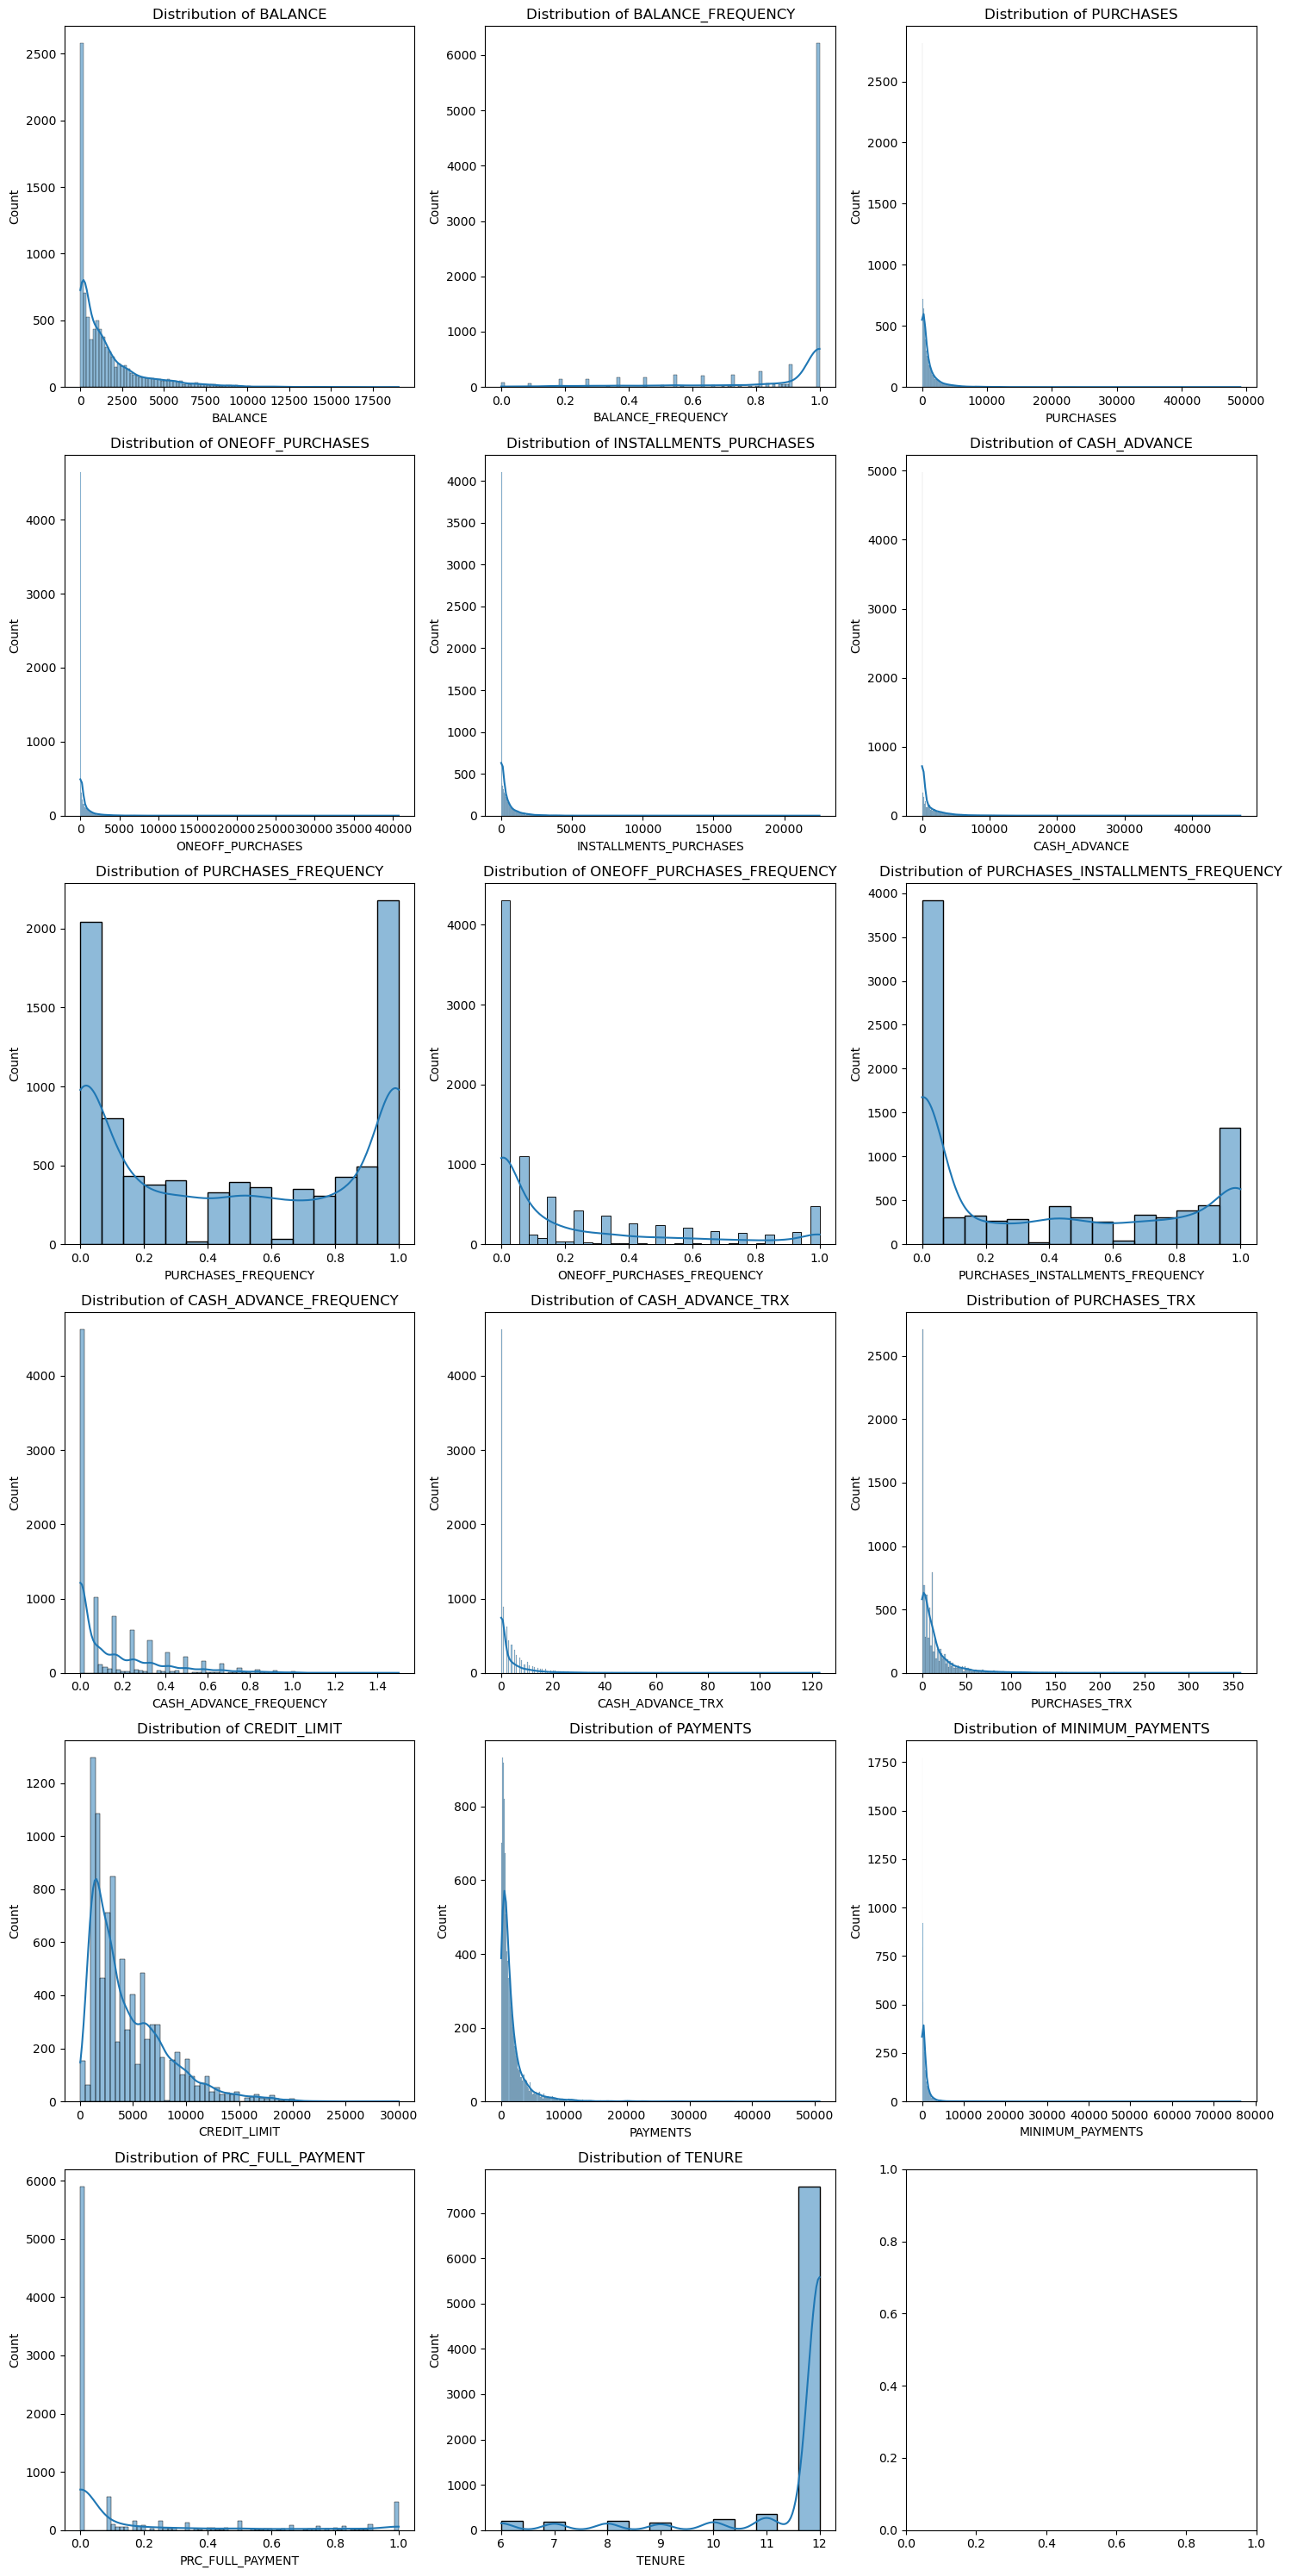

In [14]:
# Assuming df is your DataFrame
num_columns = len(df.columns)
num_rows = num_columns // 3 + (num_columns % 3 > 0)  # Adjust number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(df[column].dropna(), kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

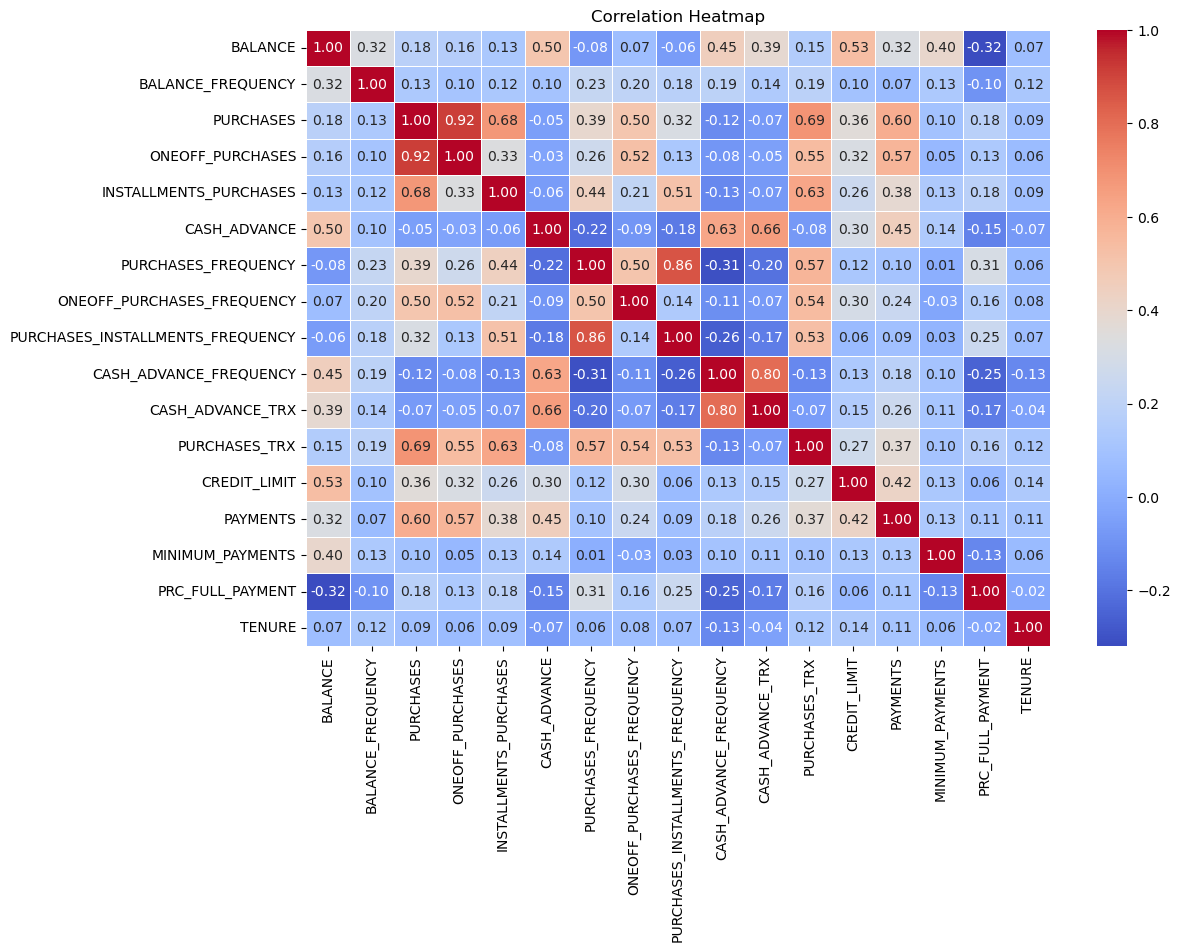

In [15]:
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler


# Assuming df is your DataFrame
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df)


# Feature Engineering and Clustering 

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)
pca_df=pd.DataFrame(data=components, columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.683831,-1.071537
1,-1.133496,2.509876
2,0.969250,-0.383721
3,-0.896867,-0.017536
4,-1.600116,-0.683151
...,...,...
8945,-0.362959,-2.012926
8946,-0.566572,-1.637056
8947,-0.929330,-1.807495
8948,-2.338044,-0.652834


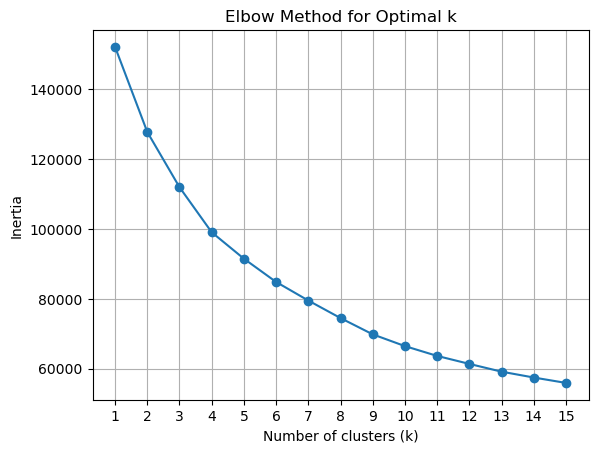

In [15]:
from sklearn.cluster import KMeans

k_range = range(1, 16)  # Range from 1 to 15, inclusive

# Initialize an empty list to store the inertia values (within-cluster sum of squares) for each value of k
inertia_values = []

# Loop over the range of k values
for k in k_range:
    # Initialize the KMeans model with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to your data
    kmeans.fit(pd.DataFrame(scaled_data))
    
    # Get the inertia value (within-cluster sum of squares) and append it to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to visualize the inertia values
import matplotlib.pyplot as plt

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [16]:
k = 4  # You can adjust this value based on your problem and elbow method

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(pd.DataFrame(scaled_data))

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame if needed
df['Cluster'] = cluster_labels

# Print the counts of data points in each cluster
print("Counts per cluster:")
print(df['Cluster'].value_counts())

Counts per cluster:
1    3980
0    3366
3    1195
2     409
Name: Cluster, dtype: int64


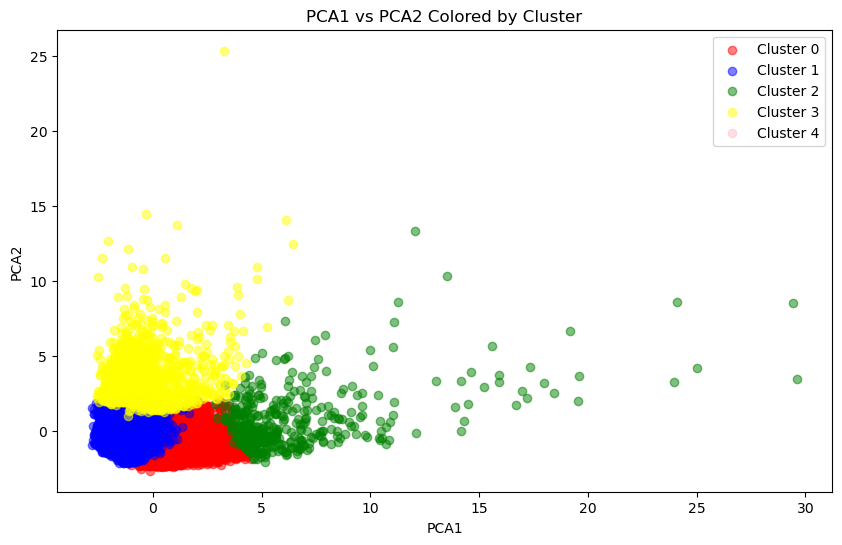

In [17]:



# Define colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'pink'}  # Adjust as needed based on the number of clusters

# Create a scatter plot for PCA1 and PCA2 colored by clusters
plt.figure(figsize=(10, 6))
for cluster, color in colors.items():
    cluster_data =pca_df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=color, alpha=0.5, label=f'Cluster {cluster}')
plt.title('PCA1 vs PCA2 Colored by Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [20]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [22]:
print("Number of columns in df:", len(df.columns))
print("Shape of cluster centers array:", kmeans.cluster_centers_.shape)
print("Data types of column names:", type(df.columns))


Number of columns in df: 18
Shape of cluster centers array: (4, 17)
Data types of column names: <class 'pandas.core.indexes.base.Index'>


In [23]:
X = df.drop('Cluster', axis=1)  # Exclude the 'Cluster' column
kmeans.fit(X)  # Fit the KMeans model
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=X.columns)  # Create DataFrame with cluster centers


In [24]:
# Inverse transform the data
cluster_centers = scaler.inverse_transform(cluster_centers)

# Create DataFrame with cluster centers using original column names
cluster_centers = pd.DataFrame(data=cluster_centers, columns=df.drop('Cluster', axis=1).columns)


In [25]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.785602e+06,1.079546,1.288721e+06,5.190448e+05,2.632509e+05,1.041637e+06,0.677750,0.248265,0.504266,0.156566,18.664393,278.771226,9.955851e+06,2.887622e+06,1.228416e+06,0.199481,26.814500
1,6.951908e+06,1.099921,3.386384e+06,1.651445e+06,5.341522e+05,4.425776e+06,0.707857,0.298241,0.517473,0.177236,42.302927,565.355744,3.284936e+07,8.379796e+06,2.816246e+06,0.194111,27.225909
2,9.976817e+06,1.092975,2.304659e+07,1.273111e+07,2.818864e+06,1.084482e+07,0.791546,0.382119,0.603311,0.180570,66.095551,2149.650646,4.540140e+07,5.267847e+07,5.600923e+06,0.252301,27.358535
3,9.266449e+06,1.110761,2.486386e+06,2.801286e+05,9.000616e+05,2.105900e+06,0.690785,0.217088,0.551345,0.152937,23.542037,572.013355,1.706193e+07,4.739621e+06,6.388101e+07,0.153715,27.470739


In [27]:
from sklearn.cluster import KMeans

# Define and fit the KMeans model
kmeans_model = KMeans(n_clusters=4)  # Specify the number of clusters
kmeans_model.fit(X)  # Fit the model to your data X


KMeans(n_clusters=4)

In [28]:
cluster_new = pd.concat([df.drop('Cluster', axis=1), pd.DataFrame({'Cluster': kmeans_model.labels_})], axis=1)


In [29]:
cluster_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,840.841715,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


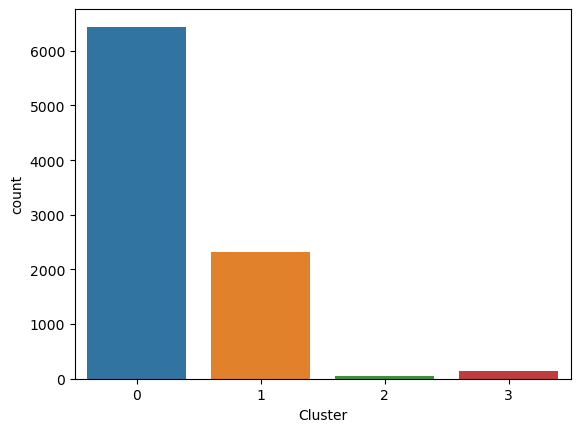

In [30]:
sns.countplot(x='Cluster', data=cluster_new)
plt.show()

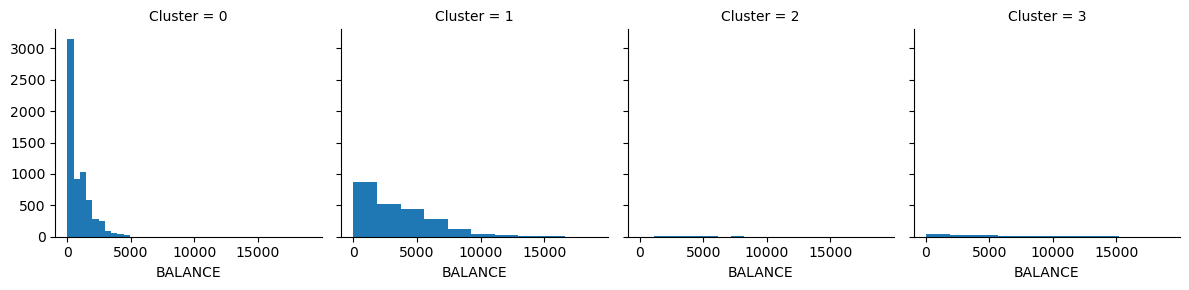

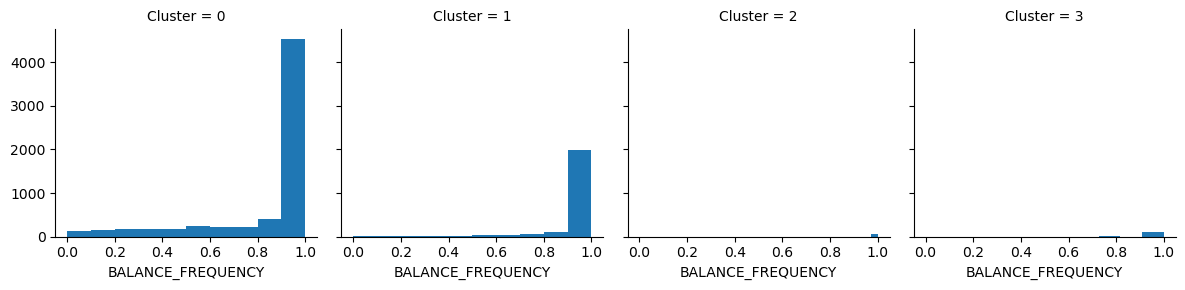

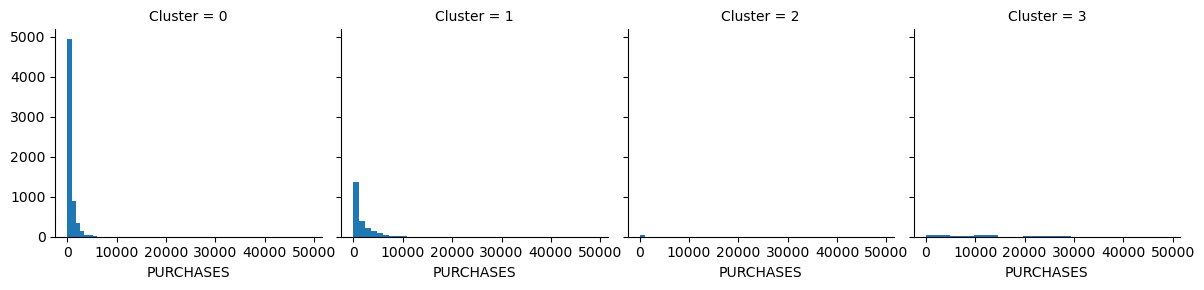

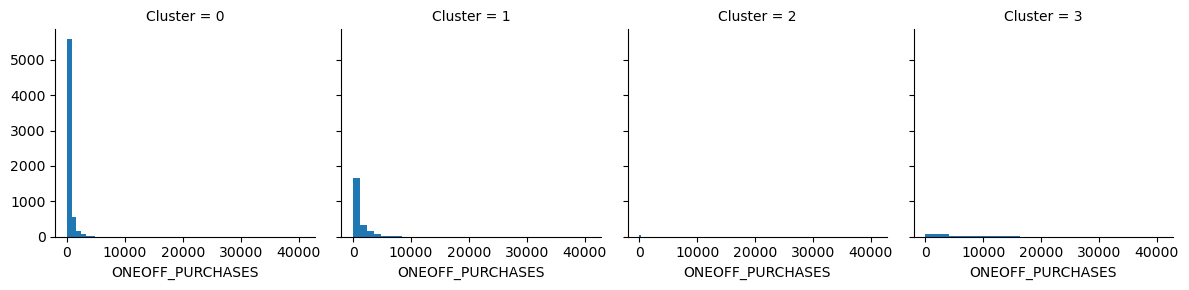

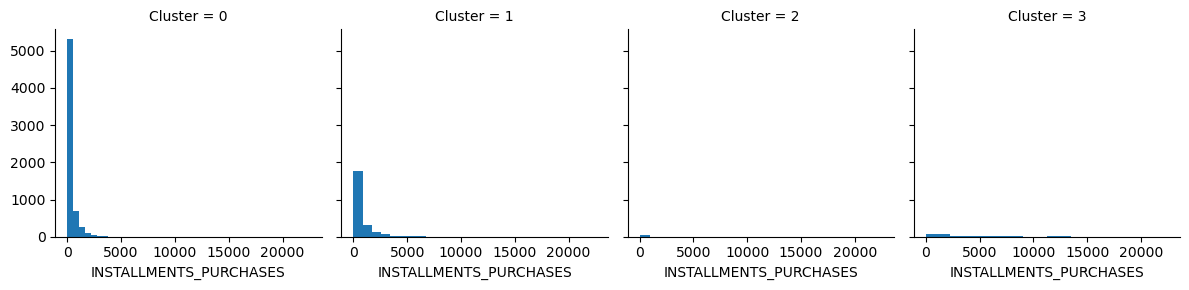

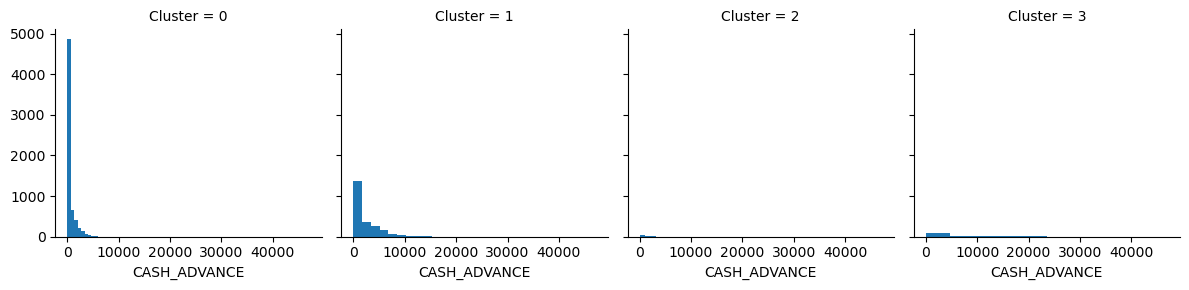

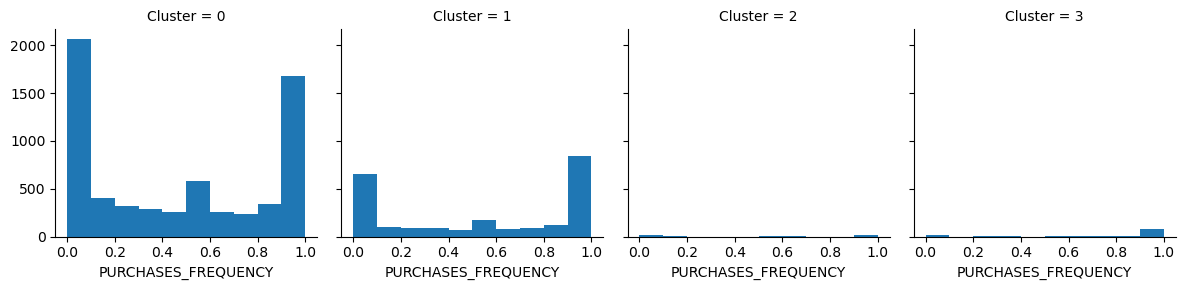

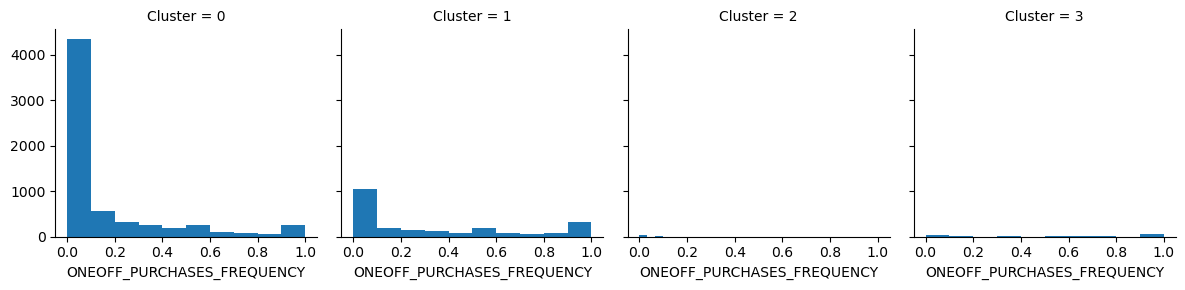

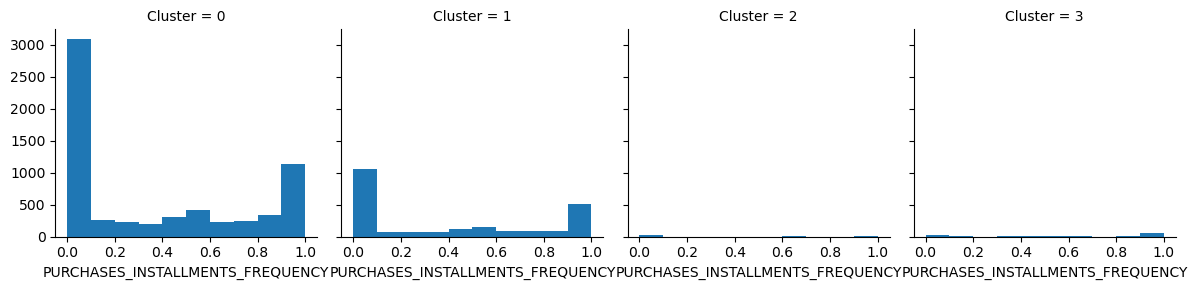

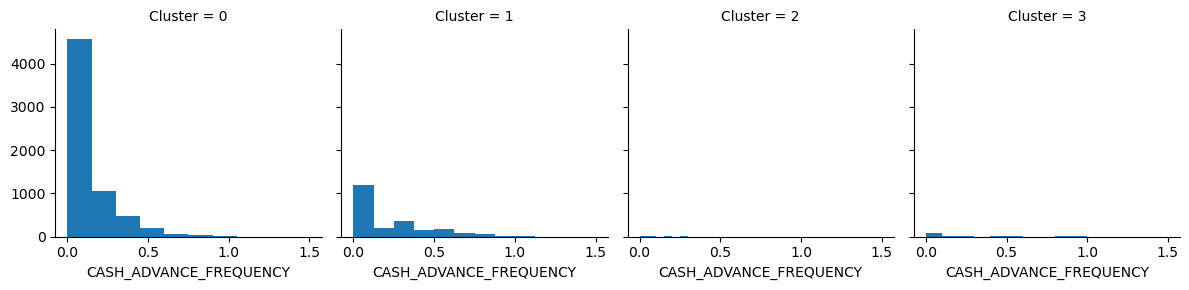

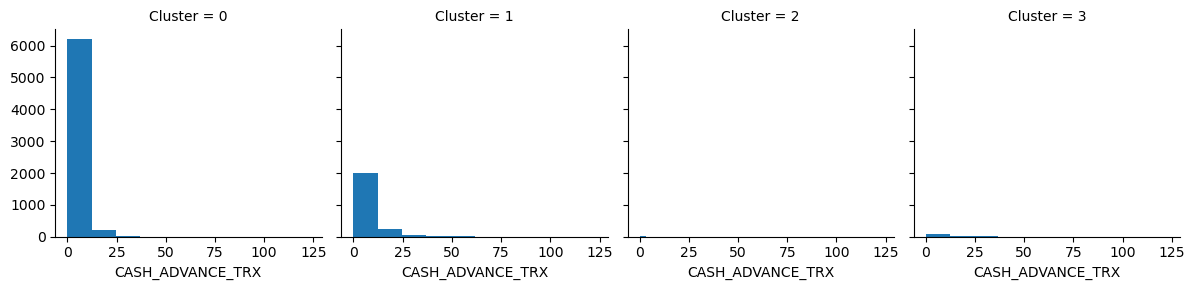

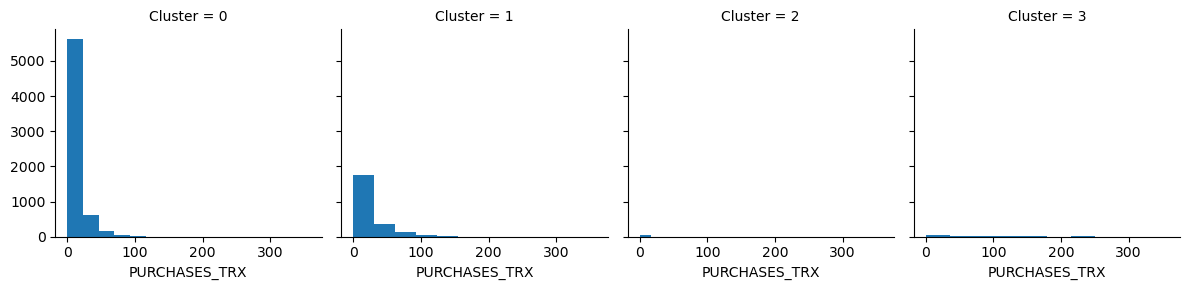

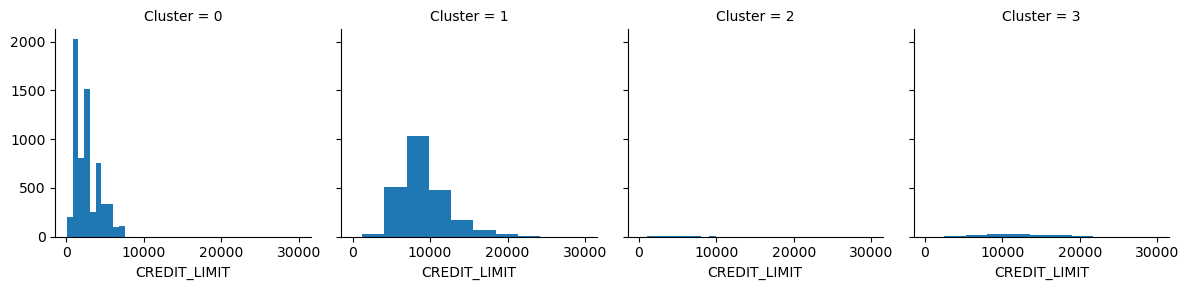

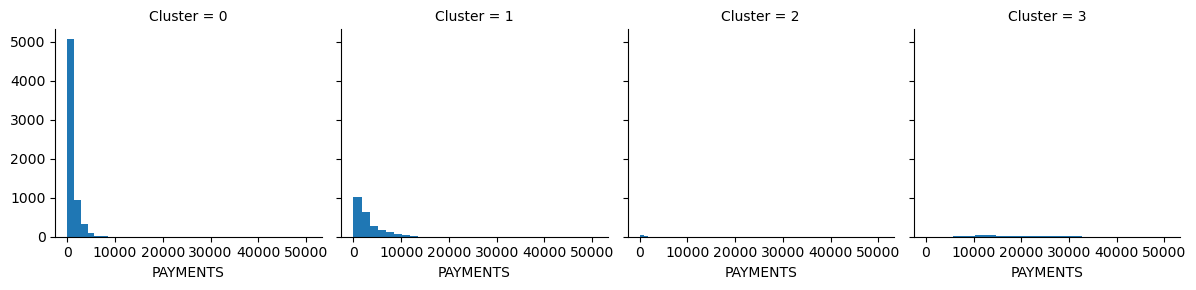

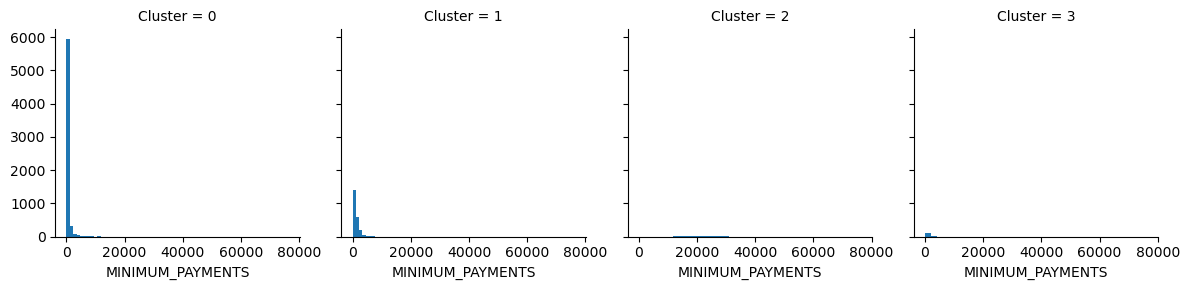

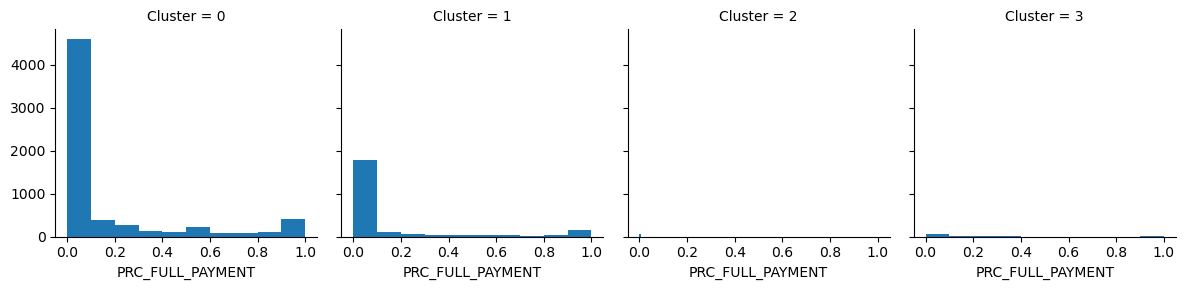

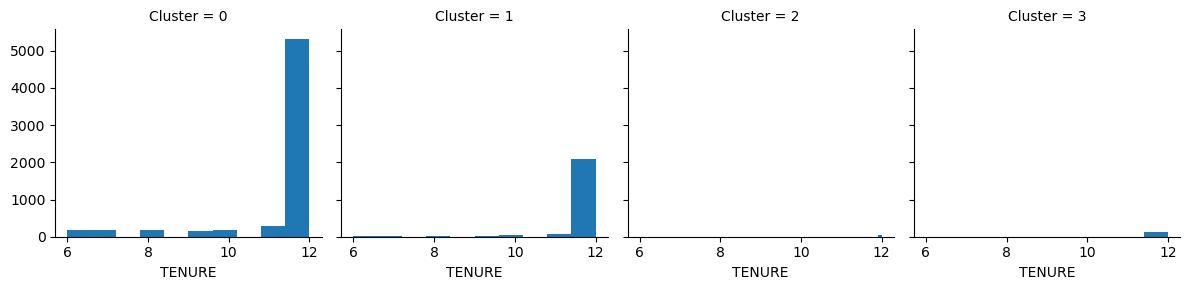

In [31]:
for c in cluster_new.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_new, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [32]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [33]:
cluster_new.to_csv("Clustered_Customer_Data.csv")

In [43]:
#Split Dataset
X = cluster_new.drop(['Cluster'],axis=1)
y= cluster_new[['Cluster']]
from sklearn.model_selection import train_test_split

# Your code for defining X and y goes here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5831,649.896506,1.000000,4919.76,4353.06,566.70,191.376535,0.916667,0.666667,0.833333,0.166667,3,48,6500.0,4854.340510,219.441278,0.166667,12
2244,2382.328208,1.000000,899.58,413.28,486.30,450.252732,1.000000,0.250000,1.000000,0.166667,4,34,2500.0,850.186851,1212.047288,0.000000,12
4205,1119.157048,1.000000,133.90,133.90,0.00,269.234406,0.166667,0.166667,0.000000,0.250000,3,3,1200.0,427.355150,320.855529,0.000000,12
7933,0.000000,0.000000,136.80,0.00,136.80,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2700.0,127.996550,840.841715,0.000000,12
8462,20.620429,0.818182,169.66,0.00,169.66,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,1000.0,192.185764,145.811693,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1079.097023,1.000000,247.44,0.00,247.44,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,503.445403,302.481716,0.000000,12
5191,833.541256,1.000000,0.00,0.00,0.00,1422.637361,0.000000,0.000000,0.000000,0.333333,8,0,2500.0,180.104404,282.085369,0.000000,12
5390,40.247238,0.181818,0.00,0.00,0.00,909.480894,0.000000,0.000000,0.000000,0.083333,2,0,1500.0,3578.648701,69.271137,1.000000,12
860,0.000000,0.000000,199.88,0.00,199.88,0.000000,0.750000,0.000000,0.750000,0.000000,0,14,4000.0,0.000000,0.000000,0.000000,12


In [45]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7669,16.834929,0.454545,15.00,15.00,0.00,209.025389,0.090909,0.090909,0.000000,0.090909,1,1,7500.0,430.213001,86.959785,0.000000,11
6125,540.020858,1.000000,612.23,495.61,116.62,1708.923217,0.666667,0.166667,0.500000,0.333333,10,10,2000.0,1642.068707,419.956251,0.000000,12
7028,119.237712,1.000000,342.74,0.00,342.74,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,2000.0,327.166041,165.207233,0.000000,12
3019,894.081947,1.000000,1901.71,1853.11,48.60,206.618780,0.666667,0.666667,0.416667,0.083333,1,33,1500.0,947.130141,220.745296,0.000000,12
3479,1294.145453,1.000000,3059.10,1836.98,1222.12,0.000000,1.000000,0.416667,1.000000,0.000000,0,42,7000.0,5560.033502,497.637767,0.083333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,7.066111,0.181818,133.16,0.00,133.16,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,16000.0,0.000000,0.000000,0.000000,12
4756,3139.267322,1.000000,5393.36,2094.44,3298.92,0.000000,1.000000,0.583333,1.000000,0.000000,0,86,3000.0,4173.119357,5573.463031,0.000000,12
889,337.317432,1.000000,4193.91,3076.01,1117.90,0.000000,1.000000,1.000000,0.583333,0.000000,0,27,3000.0,3690.904874,210.035264,1.000000,12
8404,0.000000,0.000000,64.62,0.00,64.62,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,1000.0,0.000000,0.000000,0.000000,12


In [46]:
y_train

,Cluster
5831,1
2244,0
4205,0
7933,0
8462,0
...,...
5734,0
5191,0
5390,0
860,0


In [47]:
y_test

,Cluster
7669,0
6125,0
7028,0
3019,0
3479,1
...,...
2170,1
4756,0
889,0
8404,0


# Model Training and Model Evaluation

In [59]:
from sklearn.ensemble import RandomForestClassifier


# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [60]:
from sklearn.model_selection import cross_val_score

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross-Validation Scores: [0.98547486 0.98603352 0.98603352 0.98882682 0.97821229]
Mean CV Score: 0.9849162011173183
Standard Deviation of CV Scores: 0.003550893537892875


In [51]:



from sklearn.metrics import confusion_matrix, classification_report


# Random Forest
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest:
[[1961    6    0    0]
 [  22  648    0    1]
 [   0    0   13    1]
 [   0    6    0   27]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1967
           1       0.98      0.97      0.97       671
           2       1.00      0.93      0.96        14
           3       0.93      0.82      0.87        33

    accuracy                           0.99      2685
   macro avg       0.98      0.93      0.95      2685
weighted avg       0.99      0.99      0.99      2685



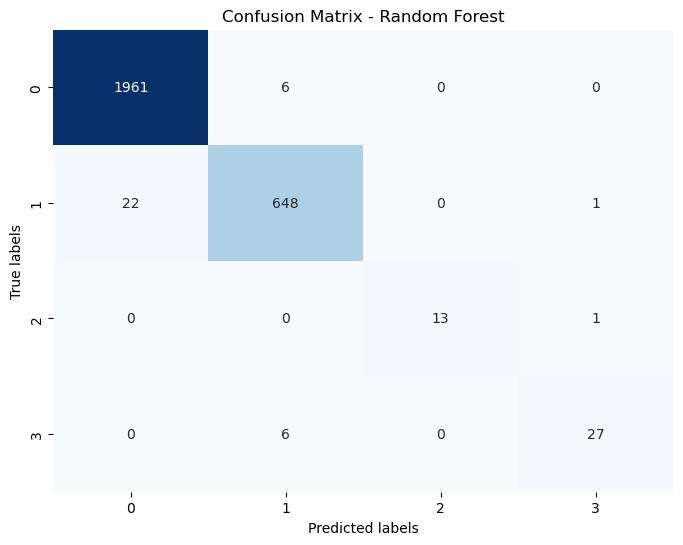

In [52]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Random Forest
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

In [58]:
import pickle

# Define the filename
filename = 'final_model.csa'

# Save the Random Forest model
pickle.dump(rf_model, open(filename, 'wb'))

 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9865921787709497 % Acuuracy
